## **Customer Segmentation using K-Means**

## Project Overview

Customer segmentation is a key business strategy used to divide customers
into distinct groups based on their purchasing behavior.

In this project, K-Means clustering is applied to identify meaningful
customer segments using the following features:

- Annual Income (k$)
- Spending Score (1–100)

The objective is to help businesses better understand customer behavior
and design targeted marketing strategies.


Skills Used:
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Scikit-learn
- Unsupervised Machine Learning


## 1.Importing Libraries 

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import plotly.io as pio
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


## 2.Data Loading & Exploration

## Dataset Description

The dataset contains demographic and spending information of mall customers.

Key features used:
- Annual Income (k$): Customer’s yearly income
- Spending Score (1–100): Score assigned based on purchasing behavior


In [40]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.shape

(200, 5)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [44]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
for col in df.columns:
    print(repr(col))

'CustomerID'
'Gender'
'Age'
'Annual Income (k$)'
'Spending Score (1-100)'


In [46]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Feature Selection

For clustering, the following features were selected:

- Annual Income (k$)
- Spending Score (1–100)

These variables directly reflect customer purchasing capacity and behavior,
making them ideal for segmentation analysis.


In [47]:
#Feature Selection 
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

## 3.Feature Scaling

## Data Preprocessing

Since K-Means is a distance-based algorithm, feature scaling is applied
to ensure equal contribution of each variable.


In [51]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(
    n_clusters=5,
    random_state=42,
    n_init=10,
)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.417


**Silhouette Score: 0.417** — This value indicates reasonably well-defined clusters with moderate separation, which is typical for real-world customer segmentation data.

In [49]:
df['Cluster'] = clusters

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

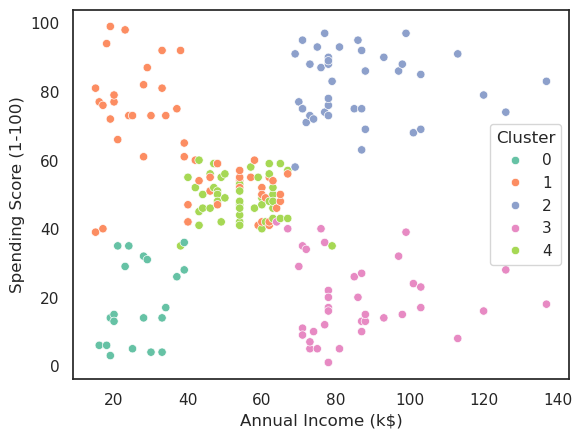

In [71]:
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    data=df,
    palette="Set2"
)

#### 3D Customer Segmentation Visualization

- To better understand customer behavior, a 3D visualization was created using Age, Annual Income, and Spending Score.
- This provides deeper insight into how customers are distributed across different segments.


In [74]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

fig = px.scatter_3d(
    df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    z="Age",
    color="Cluster",
    title="3D Customer Segmentation",
    opacity=0.7
)

fig.show()


## 4.Data Visualization 

In [55]:
plt.style.use('fivethirtyeight')

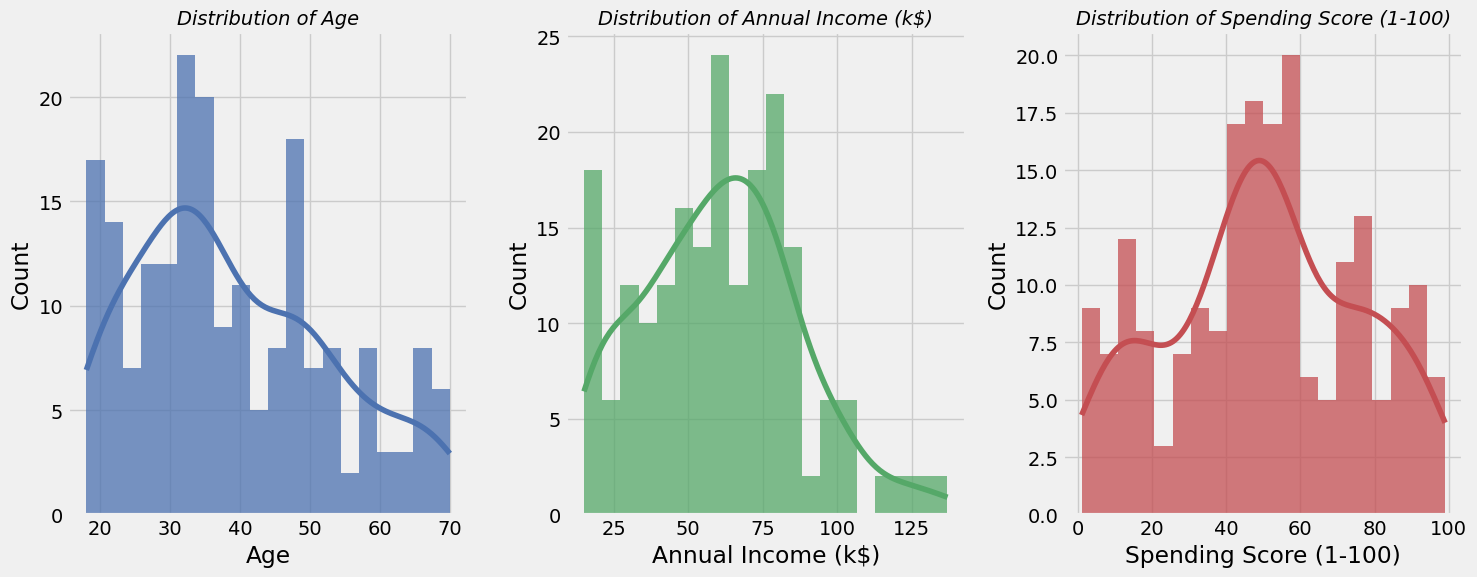

In [56]:
color_map = {
    'Age': '#4C72B0',                       #blue
    'Annual Income (k$)': '#55A868',        #green 
    'Spending Score (1-100)': '#C44E52'     #red
}
plt.figure(1 , figsize=(15, 6))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    ax = plt.subplot(1, 3, n)

    sns.histplot(
        df[x],
        bins=20,
        kde=True,
        color=color_map[x],
        edgecolors='none',
        alpha=0.75,
        linewidth=1.
    )
    ax.set_title(
        f'Distribution of {x}',
        fontsize=14,
        fontstyle='italic'
    )

plt.tight_layout()
plt.show()

#### Count plot of Gender 

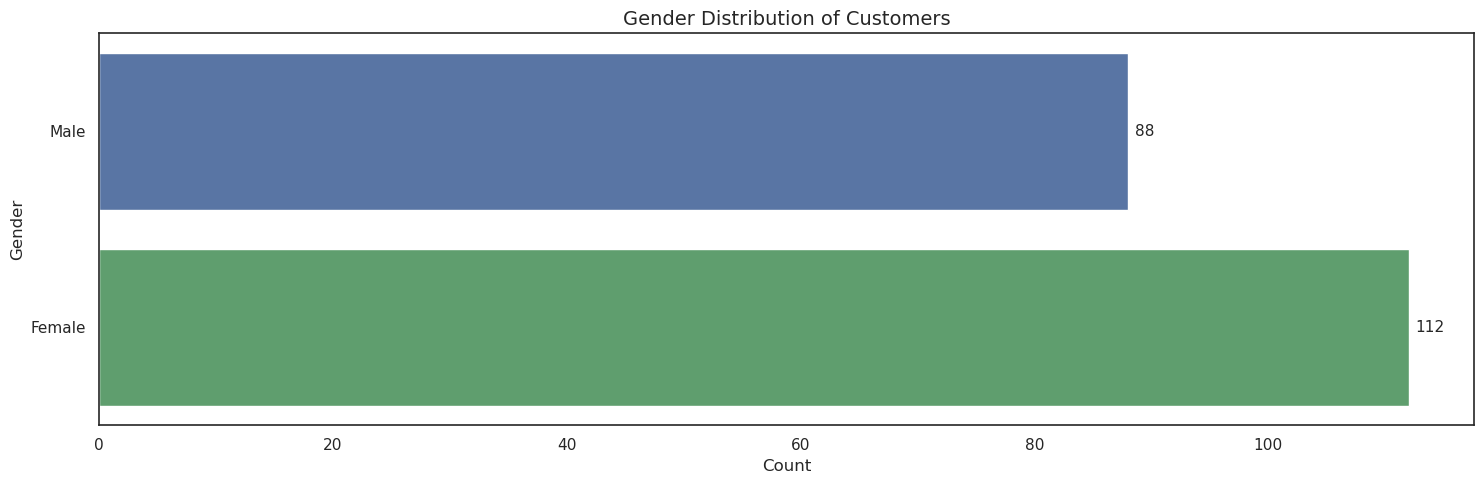

In [57]:
plt.style.use('default')
sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(
    y='Gender',
    data=df,
    palette=['#4C72B0', '#55A868'],  #blue & green
    ax=ax
)

ax.set_title(
    "Gender Distribution of Customers",
    fontsize=14,
)

ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Gender", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, padding=5, fontsize=11)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.show()


#### Customer Demographics Analysis

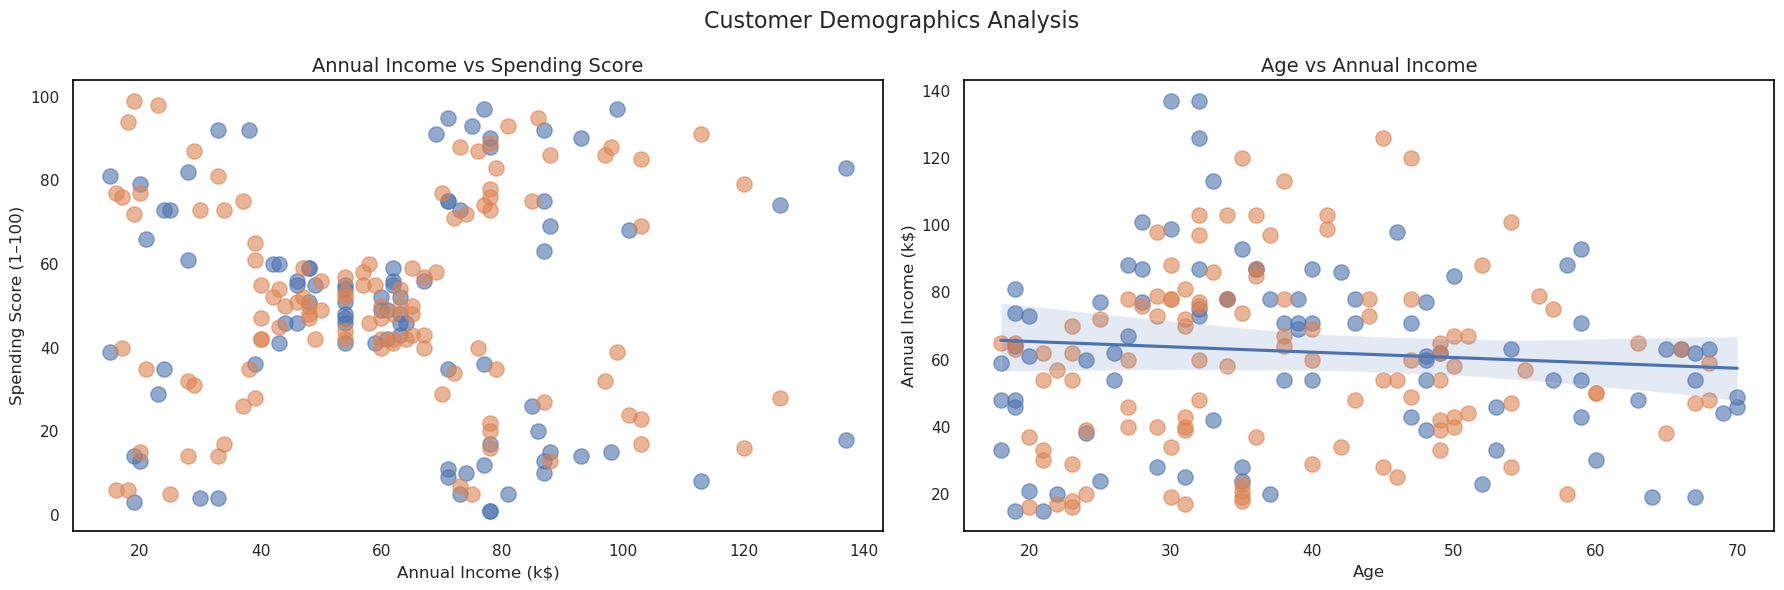

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

for gender in ['Male', 'Female']:
    subset = df[df['Gender'] == gender]
    axes[0].scatter(
        subset['Annual Income (k$)'],
        subset['Spending Score (1-100)'],
        s=120,
        alpha=0.6,
        color=colors[gender],
        label=gender
    )

axes[0].set_title('Annual Income vs Spending Score', fontsize=14)
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1–100)')

for gender in ['Male', 'Female']:
    subset = df[df['Gender'] == gender]
    axes[1].scatter(
        subset['Age'],
        subset['Annual Income (k$)'],
        s=120,
        alpha=0.6,
        color=colors[gender]
    )

sns.regplot(
    x='Age',
    y='Annual Income (k$)',
    data=df[df['Gender'] == 'Male'],
    ax=axes[1],
    scatter=False,
    color=colors['Male']
)

axes[1].set_title('Age vs Annual Income', fontsize=14)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Annual Income (k$)')

for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)
        spine.set_color('black')
        
plt.suptitle(
    'Customer Demographics Analysis',
    fontsize=16,
)

plt.tight_layout()
plt.show()


## 5.Finding optimal Number of Clusters(Elbow Method)

## Determining Optimal Number of Clusters

 The Elbow Method is used to identify the optimal value of K by analyzing the Within-Cluster Sum of Squares (WCSS).


In [75]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, 
        random_state=42,
        n_init=10
    )
    
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    

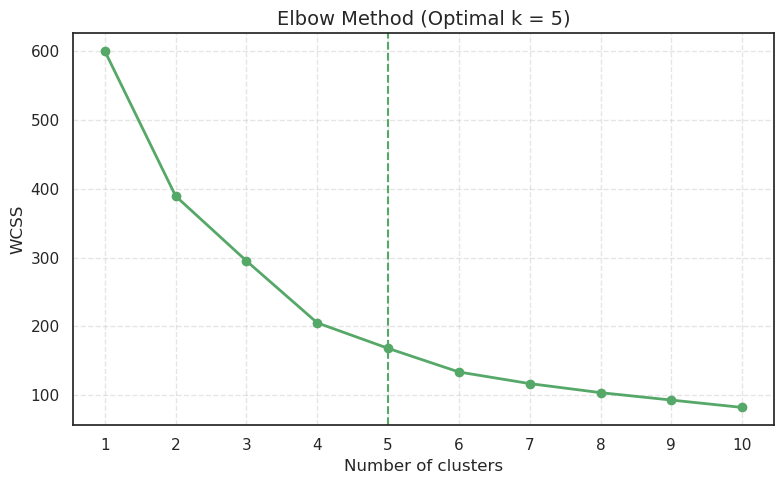

In [77]:
plt.figure(figsize=(8,5))

plt.plot(
    range(1, 11),
    wcss,
    marker='o',
    linestyle='-',
    linewidth=2,
    color='#55A868'
)

plt.axvline(x=5, linestyle='--',color='#55A868')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method (Optimal k = 5)", fontsize=14)
plt.xticks(range(1,11))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From the elbow curve, WCSS decreases sharply until k=5 and then flattens, indicating diminishing returns.
Hence, 5 clusters was selected as the optimal value.


## 6. Applying K-Means Clustering

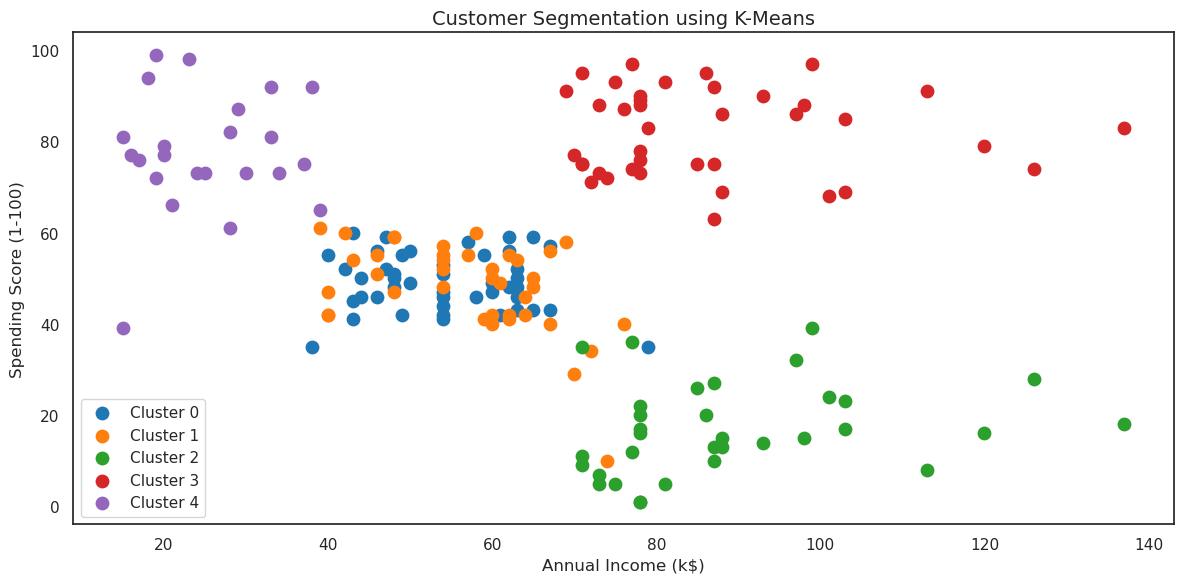

In [89]:
plt.figure(figsize=(12,6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i in range(5):
    plt.scatter(
        df[df['Cluster'] == i]['Annual Income (k$)'],
        df[df['Cluster'] == i]['Spending Score (1-100)'],
        s=80,
        c=colors[i],
        label=f'Cluster {i}',
       )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means",fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


## Cluster Interpretation

The resulting clusters represent distinct customer groups:

- Cluster 0: Low Income – Low Spending (Price-sensitive customers)
- Cluster 1: High Income – High Spending (Premium customers)
- Cluster 2: Medium Income – Medium Spending (Average customers)
- Cluster 3: High Income – Low Spending (Potential high-value targets)
- Cluster 4: Low Income – High Spending (Impulsive buyers)


In [95]:
df['label3'] = clusters
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['label3'],
        colorscale='Viridis',
        opacity=0.8
    )
)
layout = go.Layout(
    title='Customer Clusters (3D View)',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)
fig = go.Figure(data=[trace1], layout=layout)
fig.show()


## Business Recommendations

- Premium customers should be targeted with exclusive offers and loyalty programs.
- Potential customers can be engaged through personalized promotions.
- Budget customers may respond well to discounts and seasonal sales.
- Impulsive buyers can be influenced through limited-time offers.


## Conclusion

- Customers were successfully segmented into 5 clusters
- Income and spending behavior clearly differentiate groups
- This model can help marketing teams target customers effectively
